In [1]:
#correct data csv
f = open('data_10bins.csv', 'r')
newfile = open('datanew.csv', 'a')
newline = ""
for line in f:
    if '-' in line.split(',')[0]:
        newfile.write(newline + '\n')
        newline = line.strip('\n')
    else:
        newline += line.strip('\n')
f.close()
newfile.close()

In [2]:
import pandas as pd
df = pd.read_csv('data_10bins.csv')
df.head()

,obsdate,fourier_raw,fourier_raw_power,fourier_detrend,fourier_detrend_power,ls_raw,ls_raw_power,ls_detrend,ls_detrend_power
0,15-dec-12_2.16,[ 0. 15. 35. 45. 65. 30. 50. 75. 120. 105.],[0.23102167 0.01389228 0.00414216 0.00382662 ...,[ 15. 35. 45. 65. 30. 50. 75. 120. 105. 70.],[0.01389228 0.00414216 0.00382662 0.00270344 ...,[10.57342657 9.56643357 11.58041958 8.5594405...,[1.82136574 1.76602838 0.81824815 0.81813649 ...,[10.57342657 9.56643357 11.58041958 8.5594405...,[1.82136574 1.76602838 0.81824815 0.81813649 ...
1,09-aug-26_misc,[ 0. 4. 18. 8. 14. 28. 38. 72. 10. 62.],[0.60506022 0.15412822 0.05677231 0.04715063 ...,[ 4. 18. 8. 14. 28. 38. 72. 10. 62. 92.],[0.15412822 0.05677231 0.04715063 0.04257141 ...,[1.00278552 1.40389972 0.60167131 0.2005571 1...,[0.87928339 0.87589079 0.86791359 0.86666322 ...,[1.00278552 1.40389972 0.60167131 0.2005571 1...,[0.87928339 0.87589079 0.86791359 0.86666322 ...
2,12-aug-21_2.3,[ 0. 7. 4. 19. 12. 21. 22. 27. 24. 15.],[0.25053412 0.07113707 0.05256625 0.01193295 ...,[ 7. 4. 19. 12. 21. 22. 27. 24. 15. 39.],[0.07113707 0.05256625 0.01193295 0.00814895 ...,[2.10292072 1.90264256 2.30319889 0.10013908 ...,[0.66338831 0.6447257 0.6234767 0.62337935 0....,[2.10292072 1.90264256 2.30319889 0.10013908 ...,[0.66338831 0.6447257 0.6234767 0.62337935 0....
3,12-aug-21_misc,[ 0. 4.44444444 6.66666667 16.66666667 18.888...,[0.83302502 0.20830146 0.19531336 0.07321978 ...,[ 4.44444444 6.66666667 16.66666667 18.888888...,[0.20830146 0.19531336 0.07321978 0.05885337 ...,[1.44667697 1.66924266 2.11437403 1.22411128 ...,[0.54503497 0.54489251 0.54151405 0.54151261 ...,[1.44667697 1.66924266 2.11437403 1.22411128 ...,[0.54503497 0.54489251 0.54151405 0.54151261 ...
4,12-jan-27_2.03,[ 0. 28.33333333 26.66666667 21.66666667 25. ...,[0.50746899 0.04126989 0.03400823 0.02415209 ...,[28.33333333 26.66666667 21.66666667 25. 78.3...,[0.04126989 0.03400823 0.02415209 0.02264524 ...,[0.16705336 0.50116009 0.83526682 1.16937355 ...,[1.48381804 1.46846842 0.48383776 0.48361685 ...,[0.16705336 0.50116009 0.83526682 1.16937355 ...,[1.48381804 1.46846842 0.48383776 0.48361685 ...


In [134]:
from datetime import datetime
startdates = [datetime(1996, 6, 1), datetime(1999, 1, 1),
              datetime(2004, 3, 1), datetime(2009, 8, 1),
              datetime(2012, 2, 1), datetime(2015, 6, 1),
              datetime(2017, 4, 1)]
enddates = [datetime(1997, 11, 1), datetime(2002, 5, 1),
            datetime(2007, 4, 1), datetime(2010, 12, 1),
            datetime(2013, 1, 1), datetime(2016, 5, 1),
            datetime(2019, 1, 1)]

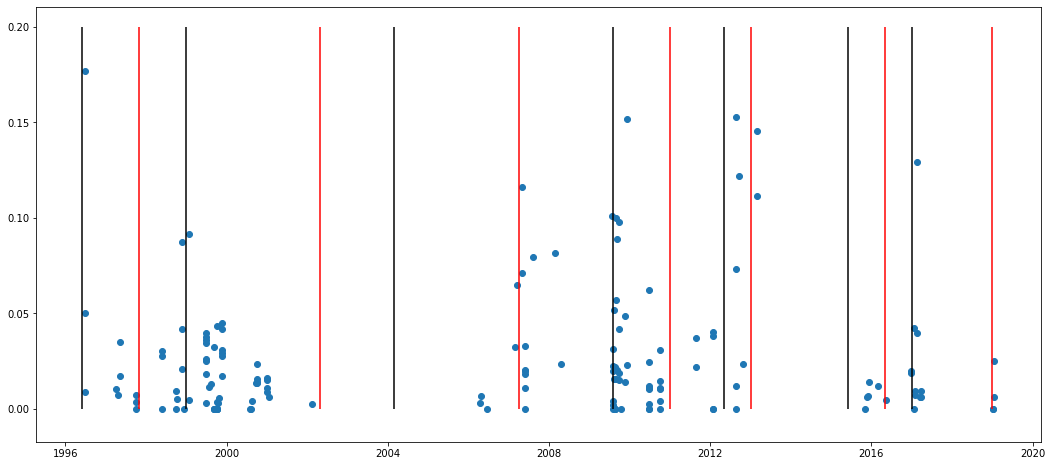

In [66]:
import matplotlib.pyplot as plt
import numpy as np

fourierWavenum = [arr[arr.find('[')+1:arr.find(']')].split(' ') for arr in df[' fourier_detrend'].tolist()]
fourierWavenum_cleaned = []
for obs in fourierWavenum:
    arr  = []
    for pt in obs:
        try:
            arr.append(float(pt))
        except:
            pass
    fourierWavenum_cleaned.append(arr)

fourierPowerPeak = [arr[arr.find('[')+1:arr.find(']')].split(' ') for arr in df[' fourier_detrend_power'].tolist()]
fourierPowerPeak_cleaned = []
for obs in fourierPowerPeak:
    arr  = []
    for pt in obs:
        try:
            arr.append(float(pt))
        except:
            pass
    fourierPowerPeak_cleaned.append(arr)
    
for obsNum in range(len(fourierWavenum_cleaned)):
    wavenumIndex = 0
    while wavenumIndex < 10:
        if fourierWavenum_cleaned[obsNum][wavenumIndex] >= 15 and fourierWavenum_cleaned[obsNum][wavenumIndex] <= 20:
            break
        wavenumIndex += 1
    if wavenumIndex >= 10:
        fourierPowerPeak_cleaned[obsNum] = 0
    else:
        fourierPowerPeak_cleaned[obsNum] = fourierPowerPeak_cleaned[obsNum][wavenumIndex]

dates = [datetime.strptime(obsdate.split('_')[0].strip(' '), '%y-%b-%d') for obsdate in df['obsdate']]
plt.figure(figsize=(18,8))
plt.scatter(dates, fourierPowerPeak_cleaned)
plt.vlines(startdates, ymin=0, ymax=0.2)
plt.vlines(enddates, ymin=0, ymax=0.2, color='red')

# plt.scatter(dates, np.array(lsPowerPeak))
plt.show()

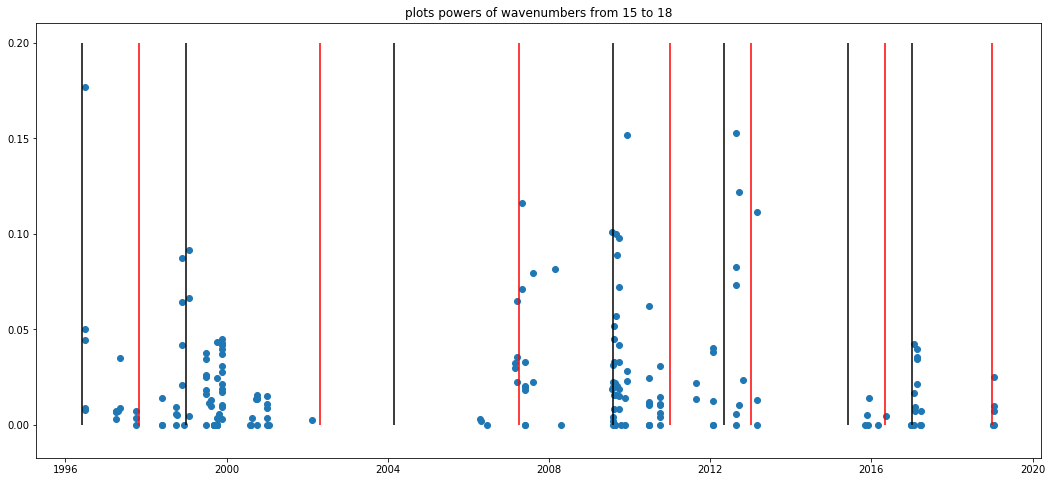

In [119]:
fourierPowerPeak_cleaned = []
for obs in fourierPowerPeak:
    arr  = []
    for pt in obs:
        try:
            arr.append(float(pt))
        except:
            pass
    fourierPowerPeak_cleaned.append(arr)
    
fourierRange = []
for obsNum in range(len(fourierWavenum_cleaned)):
    added = False
    arr = []
    for wavenumIndex in range(10):
        if fourierWavenum_cleaned[obsNum][wavenumIndex] >= 15 and fourierWavenum_cleaned[obsNum][wavenumIndex] <= 18:
            added = True
            arr.append(fourierPowerPeak_cleaned[obsNum][wavenumIndex])
    if not added:
        arr.append(0)
    fourierRange.append(arr)

# lsPowerPeak = [float(arr[arr.find('[')+1:arr.find(']')].split(' ')[0]) for arr in df[' ls_detrend_power'].tolist()]
dates = [datetime.strptime(obsdate.split('_')[0].strip(' '), '%y-%b-%d') for obsdate in df['obsdate']]
datesRange = []
for idx in range(len(fourierRange)):
    for it in range(len(fourierRange[idx])):
        datesRange.append(dates[idx])
fourierRange_flat = []
for sublist in fourierRange:
    for obs in sublist:
        fourierRange_flat.append(obs)
plt.figure(figsize=(18,8))
plt.scatter(datesRange, fourierRange_flat)
plt.vlines(startdates, ymin=0, ymax=0.2)
plt.vlines(enddates, ymin=0, ymax=0.2, color='red')
plt.title("plots powers of wavenumbers from 15 to 18")
plt.show()

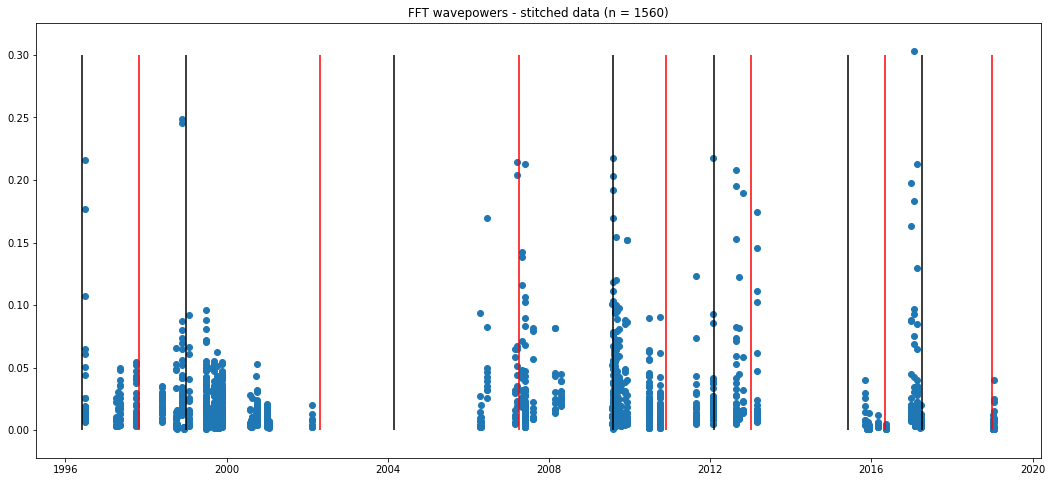

In [142]:
dates = [datetime.strptime(obsdate.split('_')[0].strip(' '), '%y-%b-%d') for obsdate in df['obsdate']]
datesRange = []
for idx in range(len(fourierPowerPeak_cleaned)):
    for it in range(len(fourierPowerPeak_cleaned[idx])):
        datesRange.append(dates[idx])
fourierPower_flat = []
for sublist in fourierPowerPeak_cleaned:
    for obs in sublist:
        fourierPower_flat.append(obs)
plt.figure(figsize=(18,8))
plt.scatter(datesRange, fourierPower_flat)
plt.vlines(startdates, ymin=0, ymax=0.3)
plt.vlines(enddates, ymin=0, ymax=0.3, color='red')
plt.title("FFT wavepowers - stitched data (n = 1560)")
plt.show()

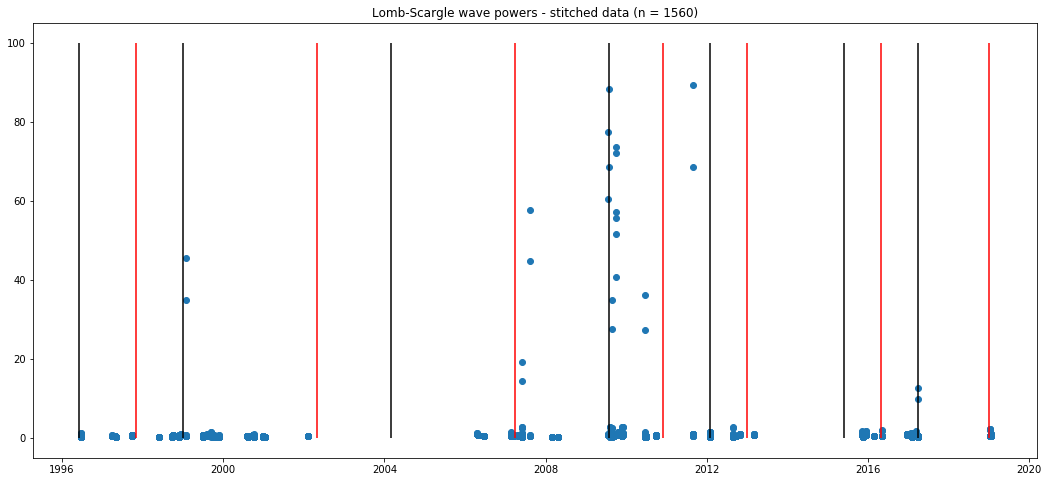

In [143]:
lsPowerPeak = [arr[arr.find('[')+1:arr.find(']')].split(' ') for arr in df[' ls_detrend_power'].tolist()]
lsPowerPeak_cleaned = []
for obs in lsPowerPeak:
    arr  = []
    for pt in obs:
        try:
            arr.append(float(pt))
        except:
            pass
    lsPowerPeak_cleaned.append(arr)
    
# lsRange = []
# for obsNum in range(len(lsPowerPeak_cleaned)):
#     added = False
#     arr = []
#     for wavenumIndex in range(10):
#         if lsPowerPeak_cleaned[obsNum][wavenumIndex] >= 15 and lsPowerPeak_cleaned[obsNum][wavenumIndex] <= 18:
#             added = True
#             arr.append(lsRange_cleaned[obsNum][wavenumIndex])
#     if not added:
#         arr.append(0)
#     lsRange.append(arr)

# lsPowerPeak = [float(arr[arr.find('[')+1:arr.find(']')].split(' ')[0]) for arr in df[' ls_detrend_power'].tolist()]
dates = [datetime.strptime(obsdate.split('_')[0].strip(' '), '%y-%b-%d') for obsdate in df['obsdate']]
datesRange = []
for idx in range(len(lsPowerPeak_cleaned)):
    for it in range(len(lsPowerPeak_cleaned[idx])):
        datesRange.append(dates[idx])
lsPowerPeak_cleaned_flat = []
for sublist in lsPowerPeak_cleaned:
    for obs in sublist:
        lsPowerPeak_cleaned_flat.append(obs)
plt.figure(figsize=(18,8))
plt.scatter(datesRange, lsPowerPeak_cleaned_flat)
plt.title("Lomb-Scargle wave powers - stitched data (n = 1560)")
plt.vlines(startdates, ymin=0, ymax=100)
plt.vlines(enddates, ymin=0, ymax=100, color='red')
plt.show()